# **Pose Detection For Weight Lifting and Exercise**

# SETUP

## Import Dependencies

In [1]:
!pip install numpy
!pip install pandas
!pip install ultralytics
!pip install matplotlib
!pip install opencv-python
!pip install pillow
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install tqdm

     ------------------------------------- 750.4/750.4 kB 23.9 MB/s eta 0:00:00
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
     --------------------------------------- 38.6/38.6 MB 65.2 MB/s eta 0:00:00
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
import numpy as np
import pandas as pd
import random

# YOLO
import ultralytics
from ultralytics import YOLO
import ultralytics.utils as plot


# Images
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Torch
import torch
from torch import nn
import torchvision
import torchvision.transforms.v2 as T

# Files
import os
from os.path import join, split
from glob import glob

# Others
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

c:\Users\chewr\anaconda3\envs\gpu\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\chewr\anaconda3\envs\gpu\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may hav

In [3]:
print(f"Numpy Version: {np.__version__}")
print(f"PyTorch Version: {torch.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"OpenCV Version: {cv2.__version__}")

Numpy Version: 1.24.2
PyTorch Version: 2.0.0+cu118
Pandas Version: 1.5.3
OpenCV Version: 4.9.0


## CONFIGURATION

In [4]:
class CFG:
    path = "./"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    device="cpu"
    random_seed = 42

print(f"DEVICE: {CFG.device}")

DEVICE: cpu


## REPRODUCIBILITY

In [5]:
torch.manual_seed(CFG.random_seed) # PyTorch
np.random.seed(CFG.random_seed) # NumPy
random.seed(CFG.random_seed) # Python

# LOAD MODEL

In [6]:
localization = YOLO('yolov8n.pt')

In [7]:
model = YOLO('yolov8n-pose.pt') 

In [45]:
cap = cv2.VideoCapture(0)

while(True): 
    ret, frame = cap.read() 
    # Display the resulting frame 
    cv2.imshow('frame', frame) 
      
    # Close Window with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
cap.release() 
cv2.destroyAllWindows() 


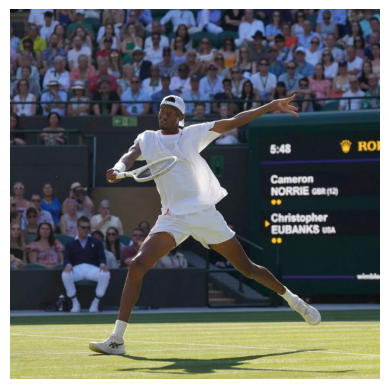

In [82]:
with Image.open("notebook_images\\test_img.jpg") as img:
    img = np.array(img)/255.0

plt.imshow(img)
plt.axis(False)
plt.show()

In [48]:
def preprocess_img(image:np.array,
                   transform = T.Resize((640,640))):
    image = image if image.shape[0] == 3 else image.transpose(2,0,1)
    if image.max() > 1.0:
        image = image/255.0
    ch, h, w = image.shape
    image = image.reshape(1, ch, h, w)
    return transform(torch.Tensor(image))


In [171]:
def detect(img):
    if img.shape[0] ==3:
        _,h,w = img.shape
    else:
        h,w,_ = img.shape

    print(h,w)
    revert_transform = T.Resize((h,w))

    result = model(preprocess_img(img))[0]

    confidence = [float(i.boxes.conf) for i in result]
    for r in list(result):
        if r.boxes.conf == max(confidence):
            im_array = r.plot(kpt_line=True, kpt_radius=10)
            im_array = revert_transform(torch.Tensor(im_array.transpose(2,0,1).reshape(1,3,640,640))).cpu().numpy().astype(np.uint8).squeeze().transpose(1,2,0)
            im_array = im_array[:,:,::-1]
            plt.imshow(im_array)
            plt.show()
    return im_array

480 640

0: 640x640 1 person, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)


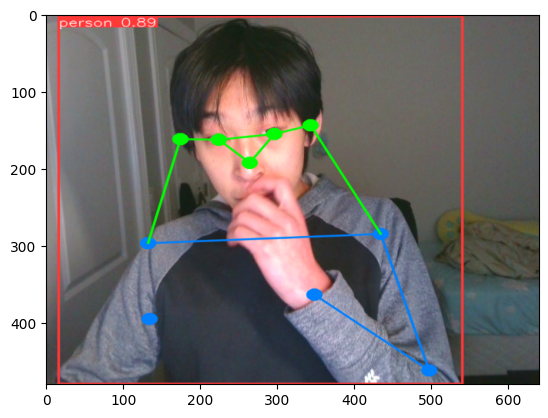

480 640

0: 640x640 1 person, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


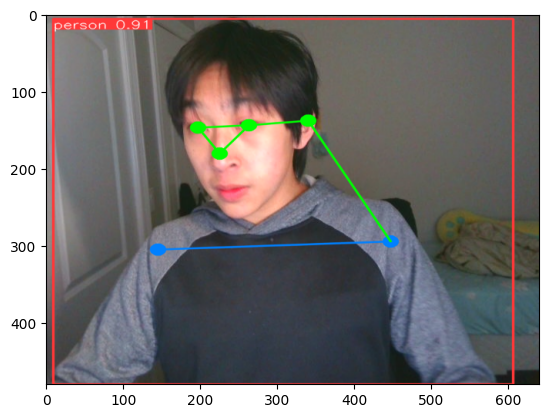

480 640

0: 640x640 1 person, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


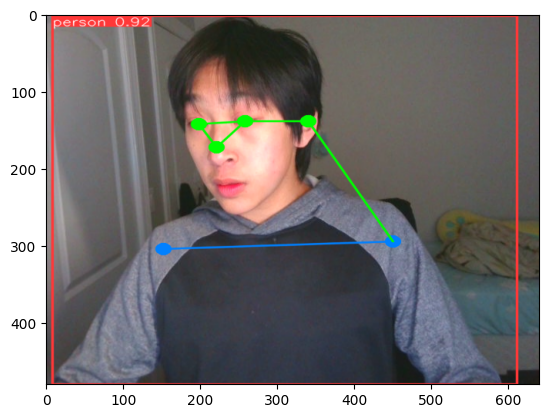

480 640

0: 640x640 1 person, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)


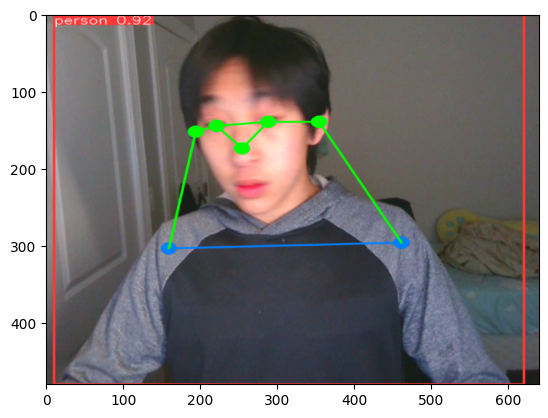

480 640

0: 640x640 1 person, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 18.0ms postprocess per image at shape (1, 3, 640, 640)


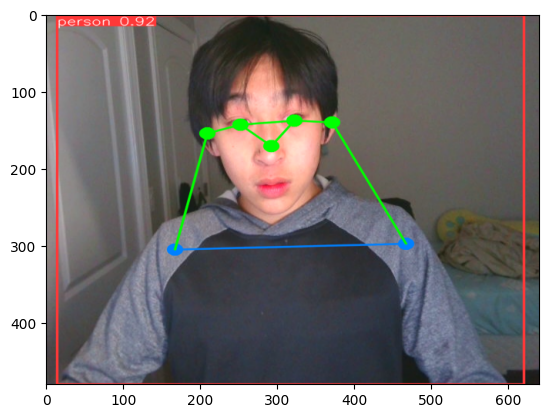

480 640

0: 640x640 1 person, 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


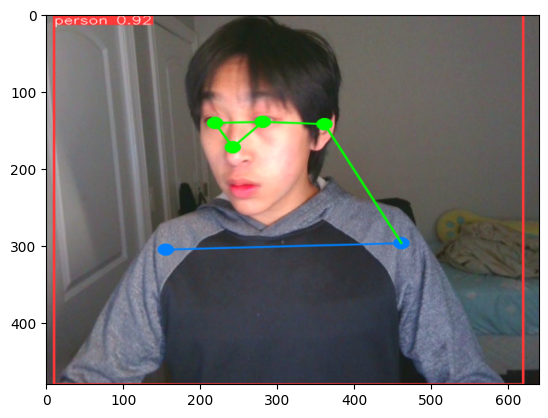

480 640

0: 640x640 1 person, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


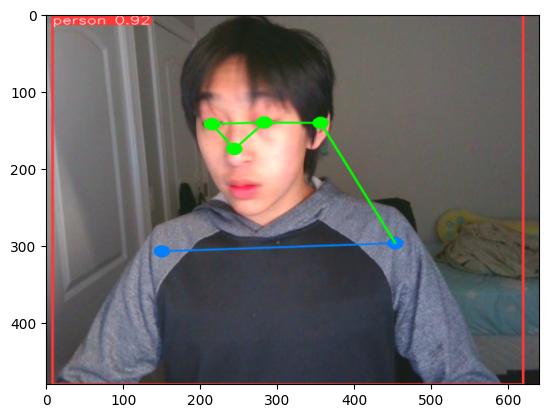

480 640

0: 640x640 1 person, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 640)


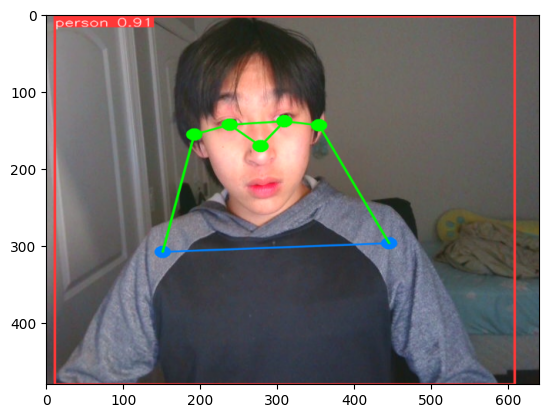

480 640

0: 640x640 1 person, 27.0ms
Speed: 1.0ms preprocess, 27.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


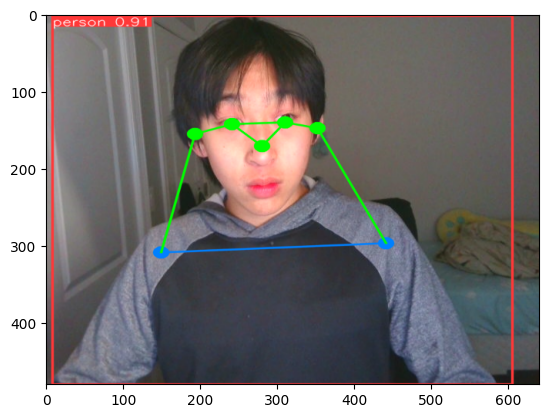

480 640

0: 640x640 1 person, 26.5ms
Speed: 1.0ms preprocess, 26.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


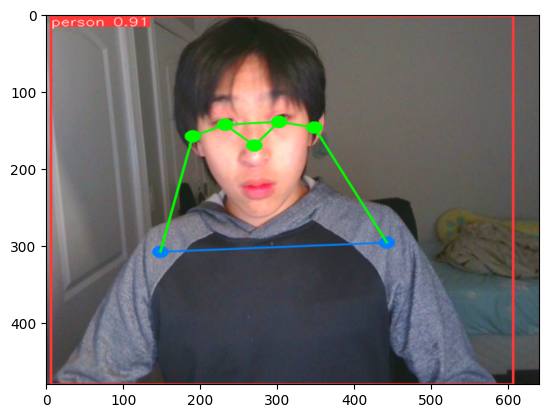

480 640

0: 640x640 1 person, 24.1ms
Speed: 1.0ms preprocess, 24.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


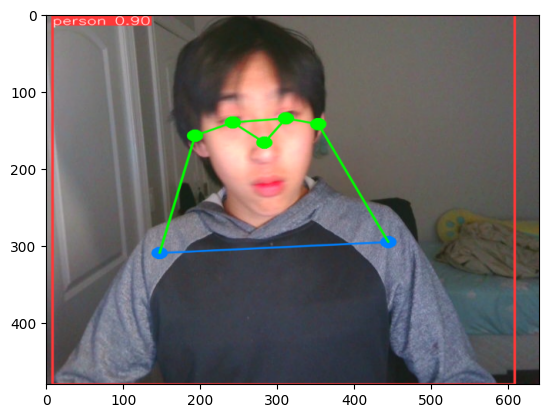

480 640

0: 640x640 1 person, 28.0ms
Speed: 1.0ms preprocess, 28.0ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


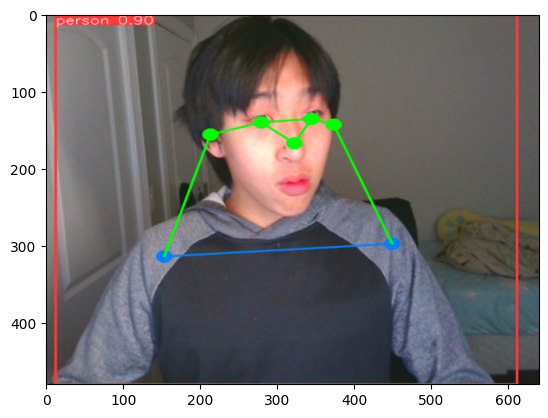

480 640

0: 640x640 1 person, 25.0ms
Speed: 1.0ms preprocess, 25.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


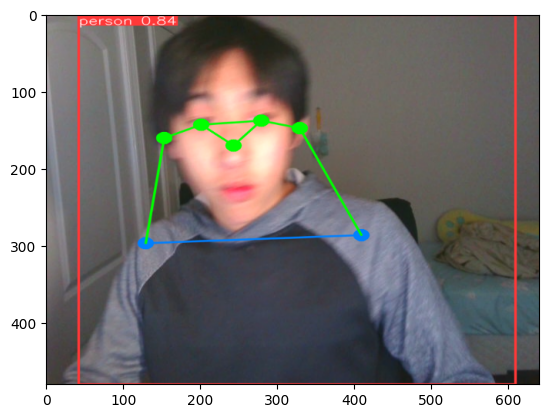

480 640

0: 640x640 1 person, 27.0ms
Speed: 1.0ms preprocess, 27.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


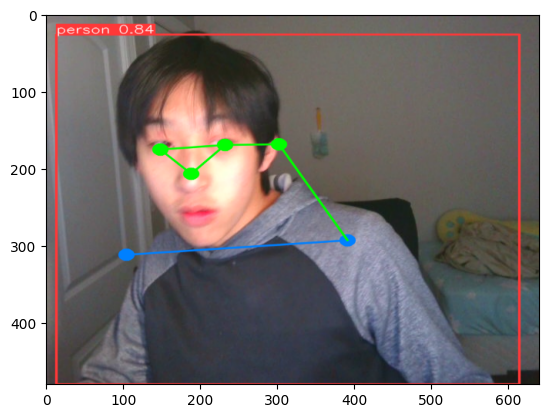

480 640

0: 640x640 1 person, 27.5ms
Speed: 1.0ms preprocess, 27.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


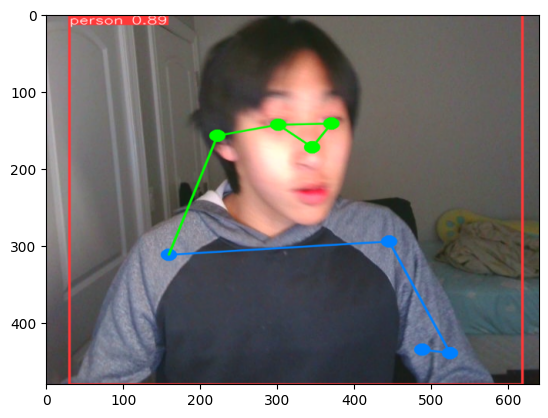

480 640

0: 640x640 1 person, 28.0ms
Speed: 1.0ms preprocess, 28.0ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 640)


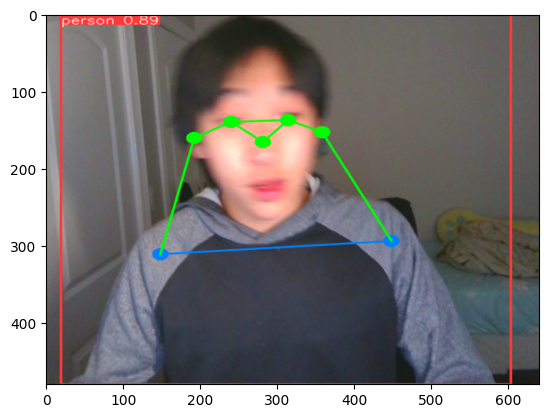

In [168]:
cap = cv2.VideoCapture(0)

while(True): 
    ret, frame = cap.read() 
    detect(frame)
    
    cv2.imshow('frame', frame) 
    Image.fromarray()
    # Close Window with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
cap.release() 
cv2.destroyAllWindows() 

In [157]:
detect(img)

1200 1200

0: 640x640 6 persons, 29.0ms
Speed: 1.0ms preprocess, 29.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


In [57]:
result = model(preprocess_img(img))[0]
result.keypoints


0: 640x640 6 persons, 30.0ms
Speed: 1.0ms preprocess, 30.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9734, 0.9223, 0.9442, 0.6578, 0.7497, 0.9826, 0.9895, 0.9306, 0.9651, 0.9072, 0.9452, 0.9836, 0.9876, 0.9703, 0.9780, 0.9364, 0.9485],
        [0.9915, 0.9766, 0.9637, 0.7491, 0.4530, 0.9943, 0.9836, 0.9927, 0.9742, 0.9711, 0.9429, 0.9997, 0.9995, 0.9987, 0.9982, 0.9860, 0.9814],
        [0.9575, 0.9230, 0.9441, 0.6567, 0.7926, 0.9661, 0.9753, 0.6909, 0.7991, 0.5380, 0.6354, 0.5743, 0.6263, 0.1292, 0.1608, 0.0574, 0.0696],
        [0.9474, 0.9485, 0.9160, 0.8275, 0.5811, 0.9669, 0.9584, 0.6631, 0.5862, 0.4377, 0.3789, 0.4765, 0.4543, 0.0894, 0.0767, 0.0501, 0.0440],
        [0.9243, 0.9063, 0.8492, 0.7650, 0.5487, 0.9594, 0.9506, 0.7283, 0.6603, 0.5331, 0.4778, 0.5242, 0.5108, 0.1012, 0.0929, 0.0426, 0.0398],
        [0.9426, 0.9141, 0.8867, 0.7295, 0.6366, 0.9696, 0.9707, 0.7879, 0.7713, 0.6456, 0.6242, 0.6340, 0.6355, 0.1743, 0.1688, 0.0786, 0.0781]], device='cuda:0')
data: tensor([[[1.2826e+02, 3.8194e+02

In [98]:
confidence = [float(i.boxes.conf) for i in result]
print(confidence)
for r in list(result):
    if r.boxes.conf == max(confidence):
        im_array = r.plot(kpt_line=True, kpt_radius=10)
        im = Image.fromarray(im_array[:,:,::-1])  
        im.show()  # show image
        im.save('results.jpg') 

[0.865199089050293, 0.8577484488487244, 0.6194029450416565, 0.3359465003013611, 0.3000008463859558, 0.273523211479187]


In [85]:
result.keypoints.data[0]

tensor([[128.2569, 381.9381,   0.9734],
        [133.0481, 378.6217,   0.9223],
        [124.0079, 377.9737,   0.9442],
        [139.6829, 382.5363,   0.6578],
        [116.5446, 380.9758,   0.7497],
        [149.1446, 403.6611,   0.9826],
        [106.7833, 404.4725,   0.9895],
        [160.7511, 434.9736,   0.9306],
        [ 99.8610, 438.7980,   0.9651],
        [157.4961, 447.8441,   0.9072],
        [106.9000, 447.2941,   0.9452],
        [146.7372, 454.0029,   0.9836],
        [117.1732, 454.3960,   0.9876],
        [153.6488, 459.2045,   0.9703],
        [106.6135, 458.0915,   0.9780],
        [153.8474, 512.3110,   0.9364],
        [108.5548, 511.3124,   0.9485]], device='cuda:0')

In [170]:
for i in result[0].keypoints:
    print(i)

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9734, 0.9223, 0.9442, 0.6578, 0.7497, 0.9826, 0.9895, 0.9306, 0.9651, 0.9072, 0.9452, 0.9836, 0.9876, 0.9703, 0.9780, 0.9364, 0.9485]], device='cuda:0')
data: tensor([[[128.2569, 381.9381,   0.9734],
         [133.0481, 378.6217,   0.9223],
         [124.0079, 377.9737,   0.9442],
         [139.6829, 382.5363,   0.6578],
         [116.5446, 380.9758,   0.7497],
         [149.1446, 403.6611,   0.9826],
         [106.7833, 404.4725,   0.9895],
         [160.7511, 434.9736,   0.9306],
         [ 99.8610, 438.7980,   0.9651],
         [157.4961, 447.8441,   0.9072],
         [106.9000, 447.2941,   0.9452],
         [146.7372, 454.0029,   0.9836],
         [117.1732, 454.3960,   0.9876],
         [153.6488, 459.2045,   0.9703],
         [106.6135, 458.0915,   0.9780],
         [153.8474, 512.3110,   0.9364],
         [108.5548, 511.3124,   0.9485]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape

In [92]:
1.875*128

240.0

In [94]:
1.875*382

716.25

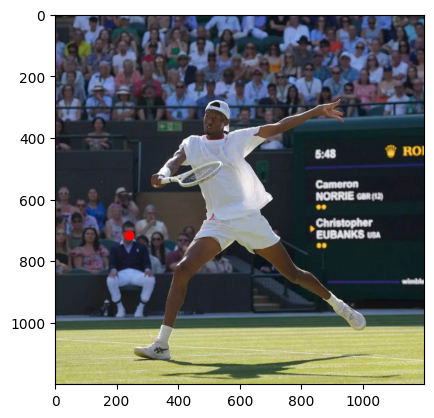

In [97]:
plt.imshow(img)
plt.plot(240, 716.25, marker='o', color="red") 

In [79]:
result.keypoints.xyn.cpu().numpy()[0][0]

array([     0.2004,     0.59678], dtype=float32)